In [1]:
import sys
if "../src/" not in sys.path:
    sys.path.append("../src/")
from roplot import FieldPowerPlay, Robot
import matplotlib.pyplot as plt
from shapely import Point

In [2]:
fpp = FieldPowerPlay()

r = Robot((16,16))
r.position = Point(63, 63)
r.heading = 80

In [3]:
from branca.element import Figure
import geopandas as gpd
import folium
crs = "Simple"
m2 = folium.Map(location=[72, 72], zoom_start=1, tiles=None, crs=crs)
fpp.add_to(m2, show_junctions=True)

# folium.GeoJson(gpd.GeoSeries(field).to_json()).add_to(m2)
m2.add_child(r, name="Robot")
# r.add_to(m2)

print(m2.__class__)
m2

<class 'folium.folium.Map'>


In [4]:
# With Robot as a GeoJson object, changing the robot position dynamically changes the resulting map
# without needing to re-generate the robot and put it in the map manually.
r.position = (86, 64) 
r.heading = 45
m2

# Potential solution: Make Robot a inherit from GeoJson and add it as an object directly. 
# Override the appropriate functions (hard part).

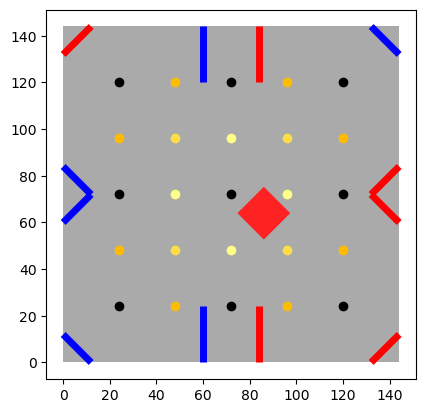

In [5]:
ax = plt.gca()
fpp.draw_on_axes(ax)
r.draw_on_axes(ax)

In [6]:
from folium import GeoJson
from typing import Callable

fig2 = Figure(width=550, height=550)
m1=folium.Map(location=[72, 72], zoom_start=1, tiles=None, crs=crs)

def style_line_color(color:str) -> Callable:
    def sf(nonsense):
        return {"color": color}
    return sf
    
for color in ("red", "blue"):
    gj = GeoJson(gpd.GeoSeries(fpp.field_lines.by_color(color)).to_json(),
                style_function=style_line_color(color))
    gj.add_to(m1)
r.add_to(m1)
# GeoJson().add_to(m2)
m1

In [7]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d")

'2023-01-03'

In [10]:
r.position = (64, 64)
r.heading = -90
m1

In [9]:
m2._children

OrderedDict([('geo_json_540c320658f15fbeb182062f2b23b07c',
              <folium.features.GeoJson at 0x7f592003ada0>),
             ('circle_09ab73990e821a5e1eb99493620ca41a',
              <folium.vector_layers.Circle at 0x7f592003b460>),
             ('circle_1d4d4843ce4becadd08cb83a984295c9',
              <folium.vector_layers.Circle at 0x7f586fa2ec50>),
             ('circle_f7bc7bb119d72f30869eb9e79e4c441d',
              <folium.vector_layers.Circle at 0x7f586fa2ffa0>),
             ('circle_a98664ea8d5e723c27505dee00b027e3',
              <folium.vector_layers.Circle at 0x7f586fa2ed10>),
             ('circle_fb939e40ec643ed84fd37fc1d9410497',
              <folium.vector_layers.Circle at 0x7f586fa2ee60>),
             ('circle_bea96abe1753f872475d8c757a22bab4',
              <folium.vector_layers.Circle at 0x7f586fa2ea40>),
             ('circle_067b58fa0115b79bf7391ee8eca650a2',
              <folium.vector_layers.Circle at 0x7f586fa2fc10>),
             ('circle_0aaf43755955